In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
games_data = pd.read_csv(
    "../Data/Processed/cleaned_data_deliveries.csv",
    low_memory=False
)

In [3]:
games_data.drop(columns=["Unnamed: 0"],inplace=True)
games_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
260915,1426312,2,KKR,SRH,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,KKR,wickets,8.0,114.0,20.0,N,No Issues,J Madanagopal,Nitin Menon
260916,1426312,2,KKR,SRH,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,KKR,wickets,8.0,114.0,20.0,N,No Issues,J Madanagopal,Nitin Menon
260917,1426312,2,KKR,SRH,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,KKR,wickets,8.0,114.0,20.0,N,No Issues,J Madanagopal,Nitin Menon
260918,1426312,2,KKR,SRH,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,KKR,wickets,8.0,114.0,20.0,N,No Issues,J Madanagopal,Nitin Menon
260919,1426312,2,KKR,SRH,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,KKR,wickets,8.0,114.0,20.0,N,No Issues,J Madanagopal,Nitin Menon


In [4]:
games_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'date', 'match_type',
       'player_of_match', 'venue', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [5]:
games_data =games_data.drop(columns=['non_striker',
        'date', 'venue', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'])

In [6]:
games_data["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [7]:
games_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,match_type,player_of_match
260915,1426312,2,KKR,SRH,9,5,SS Iyer,AK Markram,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260916,1426312,2,KKR,SRH,9,6,VR Iyer,AK Markram,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260917,1426312,2,KKR,SRH,10,1,VR Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260918,1426312,2,KKR,SRH,10,2,SS Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260919,1426312,2,KKR,SRH,10,3,VR Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc


In [8]:
games_data.groupby("season").get_group("2024").groupby("batter").get_group("B Kumar")

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,match_type,player_of_match
249315,1426261,1,SRH,KXIP,17,5,B Kumar,K Rabada,0,0,0,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249316,1426261,1,SRH,KXIP,17,6,B Kumar,K Rabada,0,0,0,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249317,1426261,1,SRH,KXIP,17,7,B Kumar,K Rabada,0,1,1,legbyes,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249318,1426261,1,SRH,KXIP,18,1,B Kumar,Arshdeep Singh,2,0,2,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249319,1426261,1,SRH,KXIP,18,2,B Kumar,Arshdeep Singh,1,0,1,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249326,1426261,1,SRH,KXIP,19,2,B Kumar,SM Curran,1,0,1,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249328,1426261,1,SRH,KXIP,19,4,B Kumar,SM Curran,2,0,2,NaN,0,NaN,NaN,NaN,2024,League,Nithish Kumar Reddy
249329,1426261,1,SRH,KXIP,19,5,B Kumar,SM Curran,0,0,0,NaN,1,B Kumar,caught,JM Bairstow,2024,League,Nithish Kumar Reddy
253776,1426279,2,SRH,RCB,13,3,B Kumar,C Green,0,0,0,NaN,0,NaN,NaN,NaN,2024,League,RM Patidar
253777,1426279,2,SRH,RCB,13,4,B Kumar,C Green,0,0,0,NaN,0,NaN,NaN,NaN,2024,League,RM Patidar


# Batsman
- Batting Average: Runs scored per dismissal.
- Strike Rate: Runs scored per 100 balls faced.
- Total Runs: Total runs scored in the season or career.
- Boundary Percentage: Percentage of runs from boundaries (fours and sixes).
- Fifties/Hundreds: Number of fifties and hundreds scored.
- Dot Ball Percentage: Percentage of balls faced without scoring.

In [9]:
grouped_data = games_data.groupby("season").get_group("2024").groupby("batter").get_group("SS Iyer")
#Batting avg
total_runs = grouped_data["batsman_runs"].sum()
total_diss = grouped_data[grouped_data["player_dismissed"]=="SS Iyer"].shape[0]
batting_avg = total_runs/total_diss
print(batting_avg)
#Strike Rate
total_balls = grouped_data.shape[0] - grouped_data["extras_type"].value_counts().get("wides",0)
strike_rate = round((total_runs/total_balls)*100,2)
print(strike_rate)
#Total Runs
print(total_runs)
#boundary Percentage
no_of_boundary =grouped_data["batsman_runs"].value_counts().get(4,0)*4+grouped_data["batsman_runs"].value_counts().get(6,0)*6
boundary_percentage =round((no_of_boundary/total_runs)*100,2)
print(boundary_percentage)
#dot Ball
total_dot_balls = grouped_data["batsman_runs"].value_counts().get(0,0)-grouped_data["extras_type"].value_counts().get("wides",0)
dot_ball_percentage  = round((total_dot_balls/total_balls)*100,2)
print(dot_ball_percentage)

39.0
146.86
351
62.68
30.96


In [10]:
6+24+10+4+15+4+23+36+7+38+32+11+24+2

236

In [11]:
grouped_data["match_id"].unique().size

14

# Bowler
- Bowling Average: Runs conceded per wicket taken.
- Economy Rate: Runs conceded per over bowled.
- Strike Rate: Balls bowled per wicket taken.
- Total Wickets: Total wickets taken in the season or career.
- Boundary Percentage: Percentage of runs conceded through boundaries (fours and sixes).
- Five-Wicket Hauls: Number of times the bowler has taken five or more wickets in an innings.
- Maidens: Number of overs bowled without conceding any runs.

In [12]:
games_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,match_type,player_of_match
260915,1426312,2,KKR,SRH,9,5,SS Iyer,AK Markram,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260916,1426312,2,KKR,SRH,9,6,VR Iyer,AK Markram,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260917,1426312,2,KKR,SRH,10,1,VR Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260918,1426312,2,KKR,SRH,10,2,SS Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc
260919,1426312,2,KKR,SRH,10,3,VR Iyer,Shahbaz Ahmed,1,0,1,NaN,0,NaN,NaN,NaN,2024,Final,MA Starc


In [13]:
bowler_grouped_data = games_data.groupby("season").get_group("2024").groupby("bowler").get_group("B Kumar")
bowler_grouped_data
no_of_balls = bowler_grouped_data.shape[0] - bowler_grouped_data[(bowler_grouped_data["extras_type"]=="noballs") | (bowler_grouped_data["extras_type"]=="wides") ].shape[0]
print("No of Balls : " ,no_of_balls)
no_of_overs = no_of_balls / 6
print("No of overs: ", no_of_overs)
total_runs = bowler_grouped_data["batsman_runs"].sum() + bowler_grouped_data[(bowler_grouped_data["extras_type"]=="noballs") | (bowler_grouped_data["extras_type"]=="wides") ].shape[0]
print("No of total runs ",total_runs)
economy = total_runs/no_of_overs
print("econmomy " ,economy)
no_of_wickets = bowler_grouped_data[bowler_grouped_data["dismissal_kind"].isna()==False].shape[0]
print("No of Wickets " ,no_of_wickets)
Bolwing_avg = total_runs/no_of_wickets
print("Bolwing avg  " ,Bolwing_avg)
strike_rate = no_of_balls/no_of_wickets
boundary_percentage = ((bowler_grouped_data[bowler_grouped_data["batsman_runs"]== 4].shape[0])+(bowler_grouped_data[bowler_grouped_data["batsman_runs"]== 6].shape[0]))/no_of_balls
boundary_percentage = boundary_percentage * 100
print("Boundary percentage: " ,boundary_percentage)


No of Balls :  342
No of overs:  57.0
No of total runs  533
econmomy  9.350877192982455
No of Wickets  11
Bolwing avg   48.45454545454545
Boundary percentage:  24.269005847953213


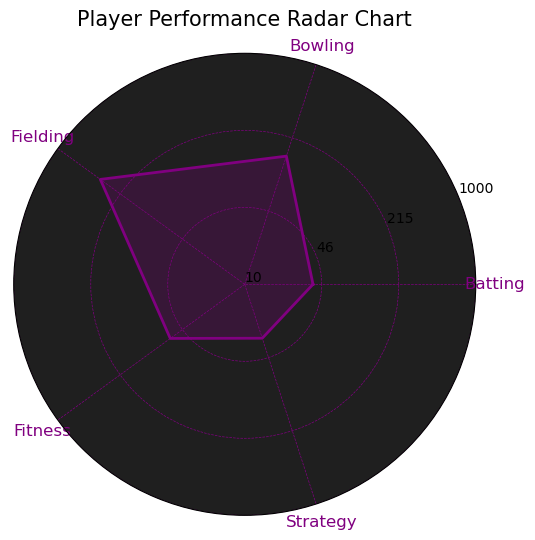

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with an outlier
categories = ['Batting', 'Bowling', 'Fielding', 'Fitness', 'Strategy']
values = [39.0, 146.86, 351, 62.68, 30.96]

# Number of variables we're plotting
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the circle
values += values[:1]
angles += angles[:1]

# Create a radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='purple', size=12)

# Use a logarithmic scale for y-axis
ax.set_yscale('log')

# Draw ylabels for logarithmic scale
log_values = np.logspace(1, 3, num=4)  # Adjust according to data range
plt.yticks(log_values, [str(int(val)) for val in log_values], color='black', size=10)
ax.yaxis.grid(True, color='purple', linestyle='--')
plt.ylim(min(log_values), max(log_values))

# Plot data
ax.plot(angles, values, color='purple', linewidth=2, linestyle='solid')

# Fill area
ax.fill(angles, values, color='purple', alpha=0.25)

# Add a title
plt.title('Player Performance Radar Chart', size=15, color='black', pad=20)

# Set the color of the plot background
ax.set_facecolor('#1f1f1f')  # Dark background

# Add a grid
ax.grid(color='purple', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


In [15]:
games_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,match_type,player_of_match
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08,League,BB McCullum
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,0,0,0,NaN,0,NaN,NaN,NaN,2007/08,League,BB McCullum
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,0,1,1,wides,0,NaN,NaN,NaN,2007/08,League,BB McCullum
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,0,0,0,NaN,0,NaN,NaN,NaN,2007/08,League,BB McCullum
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,0,0,0,NaN,0,NaN,NaN,NaN,2007/08,League,BB McCullum
